In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\USER\Desktop\New folder (2)\Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
data.rename(columns={'Sales_before_digital_add(in $)':'before'}, inplace=True)
data.rename(columns={'Sales_After_digital_add(in $)':'after'}, inplace=True)
data.head()

,Month,Region,Manager,before,after
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Month    22 non-null     object
 1   Region   22 non-null     object
 2   Manager  22 non-null     object
 3   before   22 non-null     int64 
 4   after    22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [5]:
data.dtypes

Month      object
Region     object
Manager    object
before      int64
after       int64
dtype: object

In [6]:
data.columns

Index(['Month', 'Region', 'Manager', 'before', 'after'], dtype='object')

A company started to invest in digital marketing as a new way of their product
promotions. For that they collected data and decided to carry out a study on it.

 1.The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.


In [7]:
from scipy.stats import ttest_ind 

In [8]:
t_test1,p_value1=ttest_ind(data['after'],data['before'])

In [9]:
p_value1

2.614368006904645e-16

In [10]:
if p_value1<.05:
    print("null hypothesis rejected")
else:
    print("null hypothesis accepted") 

null hypothesis rejected


If the p-value is less than the assumed significance value (0.05), then we fail to accept that there is no association between the variables. That is, we reject the NULL hypothesis and accept the alternate hypothesis claim.

Thus, in this case, we reject the Null hypothesis and assume increase in sales after
stepping into digital marketing

# We can use graph to explain the increase in sales before and after going digital which will be more easy for many to understand

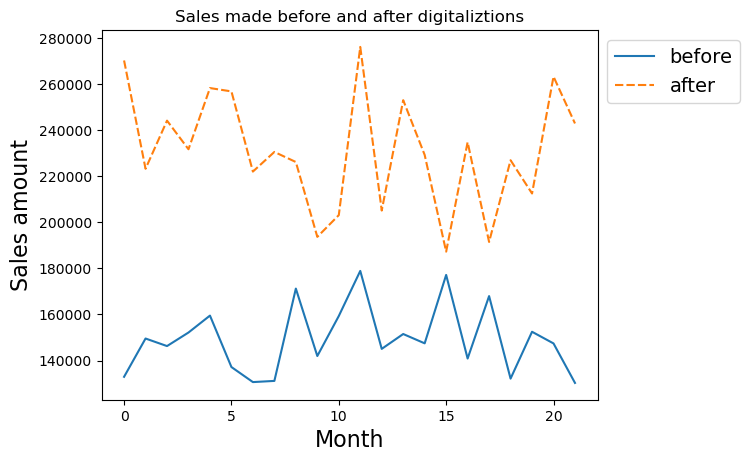

In [25]:
sns.lineplot(data=data)
plt.title("Sales made before and after digitaliztions")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left',fontsize=14)
plt.xlabel("Month",fontsize=16)
plt.ylabel("Sales amount",fontsize=16)
plt.show()

2.The company needs to check whether there is any dependency between
the features “Region” and “Manager”.


In [13]:
df = pd.crosstab(data.Region, data.Manager)
df.columns = ["Manager - A","Manager - B","Manager - C"]

df.index = ["Region - A","Region - B","Region - C"]

In [14]:
observed = df.iloc[0]   # Get table without totals for later use
df

,Manager - A,Manager - B,Manager - C
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [15]:
from scipy.stats import chi2_contingency


In [16]:
chi_stat1,p_val1,dof,exp=chi2_contingency(df)

In [17]:
p_val1  

0.5493991051158094

In [18]:
if p_val1<.05:
    print("null hypothesis rejected") 
else:
    print("null hypothesis accepted")

null hypothesis accepted


Since the null hyptheiss is accepted we assumes that there is dependency between the features “Region” and “Manager”.

# We can use graph to explain the dependency between the features “Region” and “Manager”.

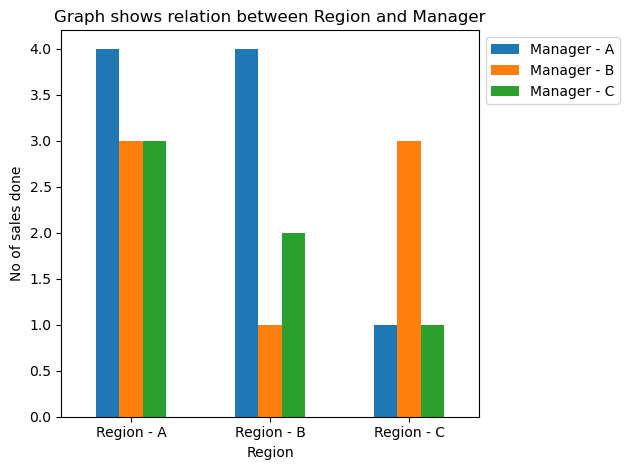

In [27]:
df = pd.crosstab(data.Region, data.Manager)
barplot = df.plot.bar(rot=0)
plt.title("Graph shows relation between Region and Manager")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.ylabel("No of sales done")
plt.tight_layout()
plt.show()